## scikit-learn 소개
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

모델은 class로 구성되어 있다. 3가지 주요한 추상 class로 부터 만들어 진다.
1. Estimator 추론기
 - fit(X, y) 메소드와 getparams, setparams
2. Transformer 변환기
 - transform 메소드를 갖는다.
 - transform 이전에 fit이 선행되어야 한다.
 - 모든 Transformer는 Estimator이다.
3. Predictor 예측기
 - predict(X) 메소드를 가지고 있다.

## 모델링 과정
1. 분석 기획
 - 목적
 - 기간/조직/비용/수집 데이터에 식별/정의
2. 데이터 수집/저장
 - [train / validation] / test
 - train: 모델을 학습하는 데 사용. w 학습
 - validation: 튜닝 파라미터를 선택
 - test: 모델의 실제 성능을 측정.

In [1]:
import sklearn

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)

model = DecisionTreeClassifier(criterion='entropy')
model

DecisionTreeClassifier(criterion='entropy')

$y \in \{0, 1\}$

$p(y=1) + p(y=0) = 1$

$$Loss(p(y=1)) = - y \log p(y=1) - (1-y)log (1 - p(y=1))$$
$$Loss(p(y=1)) = 1 - y P(y=1)^2 - (1-y)(1 - P(y=1))^2$$

In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

입력데이터 X는 data.data에 존재합니다. N=569, D=30

In [4]:
data.data.shape

(569, 30)

데이터의 평균값의 분포가 다양하므로, 스케일링이 필요하다. 다만, tree 기반의 모델은 scaling을 필요로 하지 않는다.

In [5]:
data.data.mean(axis=0)

array([1.41272917e+01, 1.92896485e+01, 9.19690334e+01, 6.54889104e+02,
       9.63602812e-02, 1.04340984e-01, 8.87993158e-02, 4.89191459e-02,
       1.81161863e-01, 6.27976098e-02, 4.05172056e-01, 1.21685343e+00,
       2.86605923e+00, 4.03370791e+01, 7.04097891e-03, 2.54781388e-02,
       3.18937163e-02, 1.17961371e-02, 2.05422988e-02, 3.79490387e-03,
       1.62691898e+01, 2.56772232e+01, 1.07261213e+02, 8.80583128e+02,
       1.32368594e-01, 2.54265044e-01, 2.72188483e-01, 1.14606223e-01,
       2.90075571e-01, 8.39458172e-02])

In [6]:
data.data.std(axis=1)

array([397.01313121, 415.05100809, 366.80950888, 120.84759716,
       357.93336541, 155.08059187, 336.14518454, 187.39668929,
       158.79650076, 150.33417158, 245.66631693, 266.40577608,
       305.40278779, 206.05881722, 159.17458781, 202.00107032,
       233.36343228, 270.35223545, 476.71779915, 159.68812226,
       143.64883623,  73.60159388, 212.12981239, 522.29909762,
       422.11186554, 302.69896894, 194.07040944, 312.00076821,
       257.66566621, 272.85685186, 349.9270297 , 174.79758505,
       283.83891782, 378.25196912, 263.11065306, 264.27072406,
       179.07302604, 132.83930105, 173.34259613, 163.03007171,
       170.06673816, 111.51908458, 348.67753164, 186.10247875,
       160.22280389, 333.77800118,  55.83278523, 163.14723955,
       129.32745633, 157.29814564, 117.7509573 , 152.93513656,
       120.38650066, 294.11706773, 219.93208925, 114.32791738,
       428.37470713, 207.96000984, 143.35040602,  62.75371379,
        84.96551274,  62.24973067, 203.02387274,  71.44

In [7]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [8]:
data.target[-10:]

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1])

In [9]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [11]:
data.target.shape

(569,)

In [12]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(426, 30) (143, 30) (426,) (143,)


In [13]:
143*4

572

In [14]:
data.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [15]:
data.target[0]

0

[Quiz] target에서 1과 0의 빈도를 계산해보자.

In [16]:
import numpy as np
uniq, freq = np.unique(data.target, return_counts=True)
uniq, freq

(array([0, 1]), array([212, 357]))

In [17]:
import pandas as pd
pd.Series(data.target).value_counts()

1    357
0    212
dtype: int64

모델을 학습데이터로 학습하고, 테스트 데이터로 예측을 수행하여 예측값 y_pred을 생성합니다.

In [18]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1])

이를 테스트데이터의 참값과 비교해 봅니다.

In [19]:
y_test

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1])

테스트 데이터에서의 정확도는 아래와 같이 수행될 수 있습니다.

In [20]:
(y_pred == y_test).mean()

0.958041958041958

위 과정을 score 메소드를 이용하여 한번에 수행할 수 있습니다. train과 test의 차이가 많이 나서 실제 정확도(test에서의)는 만족스럽지 못하다.

In [21]:
model.score(X_test, y_test)

0.958041958041958

In [22]:
model.score(X_train, y_train)

1.0

모델의 학습내용은 tree에 저정되어 있습니다. graphviz는 아래와 같이 간단히 설치한다.
```bash
pip install graphviz
```

In [23]:
!pip install graphviz

In [24]:
tree = model.tree_

In [25]:
import graphviz
from sklearn.tree import export_graphviz, plot_tree

아래와 같이 plot_tree 함수로 split point와 tree를 그려볼 수 있습니다.

[Text(209.25000000000003, 203.85, 'X[7] <= 0.051\nentropy = 0.951\nsamples = 426\nvalue = [158, 268]'),
 Text(120.9, 176.67000000000002, 'X[20] <= 16.83\nentropy = 0.327\nsamples = 267\nvalue = [16, 251]'),
 Text(74.4, 149.49, 'X[10] <= 0.626\nentropy = 0.142\nsamples = 249\nvalue = [5, 244]'),
 Text(37.2, 122.31, 'X[21] <= 30.145\nentropy = 0.095\nsamples = 246\nvalue = [3, 243]'),
 Text(18.6, 95.13, 'entropy = 0.0\nsamples = 213\nvalue = [0, 213]'),
 Text(55.800000000000004, 95.13, 'X[20] <= 14.43\nentropy = 0.439\nsamples = 33\nvalue = [3, 30]'),
 Text(37.2, 67.94999999999999, 'entropy = 0.0\nsamples = 23\nvalue = [0, 23]'),
 Text(74.4, 67.94999999999999, 'X[2] <= 86.26\nentropy = 0.881\nsamples = 10\nvalue = [3, 7]'),
 Text(55.800000000000004, 40.77000000000001, 'X[25] <= 0.149\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(37.2, 13.590000000000003, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(74.4, 13.590000000000003, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),


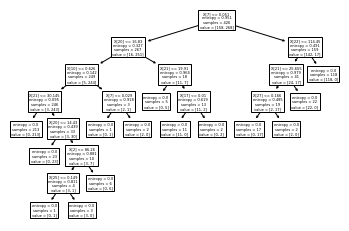

In [26]:
plot_tree(model)

아래 작업을 수행하기 위한 준비사항:
1. pip install graphviz
2. [graphviz 사이트](https://graphviz.org/download/)에서 설치파일을 다운로드하고 설치한다.
3. 환경변수에 graphviz 설치폴더의 bin 폴더를 path를 등록.(설치옵션)
4. 컴퓨터를 재부팅시킨다.

In [27]:
from google.colab import drive
import os
drive.mount('/content/drive/')
os.chdir('/content/drive/My Drive/Colab Notebooks/MLStart')
!pwd

Mounted at /content/drive/
/content/drive/My Drive/Colab Notebooks/MLStart


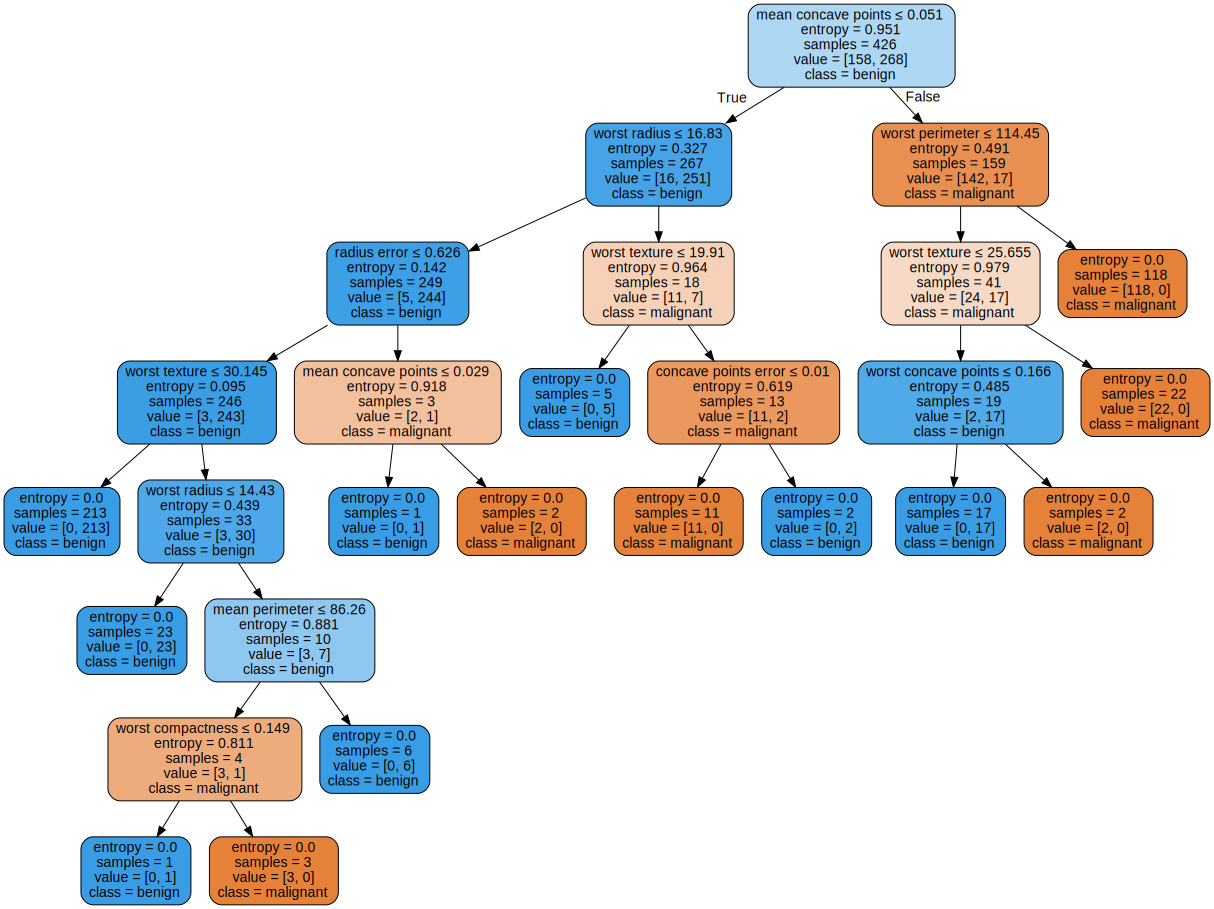

In [28]:
dot_data = export_graphviz(model, out_file=None, 
                     feature_names=data.feature_names,  
                     class_names=data.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [29]:
export_graphviz(model, out_file='tree.dot',
                feature_names=data.feature_names,  
                class_names=data.target_names,  
                filled=True, rounded=True,  
                special_characters=True)

with open("tree.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph); dot.format='png'
dot.render(filename='tree')

'tree.png'

In [30]:
from sklearn.tree import export_text
treetext = export_text(model, decimals=4,
                       feature_names=list(data.feature_names))
print(treetext)

|--- mean concave points <= 0.0513
|   |--- worst radius <= 16.8300
|   |   |--- radius error <= 0.6256
|   |   |   |--- worst texture <= 30.1450
|   |   |   |   |--- class: 1
|   |   |   |--- worst texture >  30.1450
|   |   |   |   |--- worst radius <= 14.4300
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- worst radius >  14.4300
|   |   |   |   |   |--- mean perimeter <= 86.2600
|   |   |   |   |   |   |--- worst compactness <= 0.1490
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- worst compactness >  0.1490
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- mean perimeter >  86.2600
|   |   |   |   |   |   |--- class: 1
|   |   |--- radius error >  0.6256
|   |   |   |--- mean concave points <= 0.0288
|   |   |   |   |--- class: 1
|   |   |   |--- mean concave points >  0.0288
|   |   |   |   |--- class: 0
|   |--- worst radius >  16.8300
|   |   |--- worst texture <= 19.9100
|   |   |   |--- class: 1
|   |   |--- worst texture >  19.

[Quiz] 위 모델에 대해 DecisionTreeClassifier의 옵션을 조정하여 test 데이터에 대한 정확도를 향상시켜보자.

In [31]:
m = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5)
m.fit(X_train, y_train)
score = m.score(X_test, y_test)
score

0.965034965034965

In [32]:
best= {}
best['score'] = 0
mds = [3,4,5,6]
msls = range(2, 11)
mlns = range(7, 12)
for md in mds:
    for msl in msls:
        for mln in mlns:
            m = DecisionTreeClassifier(criterion='entropy', max_depth=md, 
                                       min_samples_leaf=msl, max_leaf_nodes=mln)
            m.fit(X_train, y_train)
            score = m.score(X_test, y_test)
            if score > best['score']:
                print(f"current best score is {score} at md={md}, msl={msl}, mln={mln}")
                best['score'], best['md'], best['msl'], best['mln'], best['model'] = score, md, msl, mln, m
print(best)

current best score is 0.958041958041958 at md=3, msl=2, mln=7
current best score is 0.965034965034965 at md=3, msl=2, mln=9
current best score is 0.972027972027972 at md=4, msl=6, mln=11
{'score': 0.972027972027972, 'md': 4, 'msl': 6, 'mln': 11, 'model': DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=11,
                       min_samples_leaf=6)}


### Scaler 사용해보기
fit_transform 메소드는 학습과 변환을 한번에 수행한다. 아래 코드는 같은 결과를 생성한다.
```python
X_tr_scaled = scaler.fit_transform(X_train)
X_tr_scaled = scaler.fit(X_train).transform(X_train)
```

StandardScaler는 평균을 0, 표준편차를 1로 정규분포화하는 스케일러이다.

In [33]:
from sklearn.preprocessing import StandardScaler

print(X_train[:1])

scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)
print(X_tr_scaled[:1])
X_tst_scaled = scaler.transform(X_test)

[[1.289e+01 1.312e+01 8.189e+01 5.159e+02 6.955e-02 3.729e-02 2.260e-02
  1.171e-02 1.337e-01 5.581e-02 1.532e-01 4.690e-01 1.115e+00 1.268e+01
  4.731e-03 1.345e-02 1.652e-02 5.905e-03 1.619e-02 2.081e-03 1.362e+01
  1.554e+01 8.740e+01 5.770e+02 9.616e-02 1.147e-01 1.186e-01 5.366e-02
  2.309e-01 6.915e-02]]
[[-0.34913849 -1.43851335 -0.41172595 -0.39047943 -1.86366229 -1.26860704
  -0.82617052 -0.95286585 -1.72936805 -0.9415409  -0.86971355 -1.35865347
  -0.83481506 -0.57230673 -0.74586846 -0.65398319 -0.52583524 -0.94677147
  -0.53781728 -0.63449458 -0.54268486 -1.65565452 -0.58986401 -0.52555985
  -1.51066925 -0.89149994 -0.75021715 -0.91671059 -0.92508585 -0.80841115]]


In [34]:
means, stds = X_train.mean(axis=0), X_train.std(axis=0)
((X_train - means)/stds)[:1]

array([[-0.34913849, -1.43851335, -0.41172595, -0.39047943, -1.86366229,
        -1.26860704, -0.82617052, -0.95286585, -1.72936805, -0.9415409 ,
        -0.86971355, -1.35865347, -0.83481506, -0.57230673, -0.74586846,
        -0.65398319, -0.52583524, -0.94677147, -0.53781728, -0.63449458,
        -0.54268486, -1.65565452, -0.58986401, -0.52555985, -1.51066925,
        -0.89149994, -0.75021715, -0.91671059, -0.92508585, -0.80841115]])

In [35]:
X_tr_scaled.mean(0)

array([-1.14384245e-15, -3.57955710e-15, -3.22772586e-15, -1.17016464e-16,
       -2.68851191e-15,  7.47445924e-16,  7.68555798e-16,  4.09166702e-16,
       -3.85711286e-17, -7.70380108e-16,  5.29310555e-16,  4.66502163e-17,
       -2.30384308e-16, -6.49193792e-16, -2.26605380e-15, -2.03019656e-15,
        1.85037171e-17,  1.48524907e-15, -1.44615671e-15,  1.92855643e-16,
        1.53815406e-15,  1.26659246e-15, -1.70338443e-15, -1.86314188e-15,
        5.40777647e-16,  5.78566928e-16, -3.92487295e-16, -1.41514343e-16,
        6.83073837e-16, -2.73933197e-15])

In [36]:
X_tr_scaled.std(0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [37]:
m2 = DecisionTreeClassifier(criterion='entropy', max_depth=5)
m2.fit(X_tr_scaled, y_train)
m2.score(X_tst_scaled, y_test)

0.958041958041958

In [38]:
export_graphviz(m2, out_file='tree2.dot',
                feature_names=data.feature_names,  
                class_names=data.target_names,  
                filled=True, rounded=True,  
                special_characters=True)

with open("tree2.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph); dot.format='png'
dot.render(filename='tree2')

'tree2.png'

In [39]:
model.score(X_train, y_train)

1.0

스케일된 데이터로 학습한 모델로 스케일링이 않된 데이터로 평가하면 엉뚱한 결론에 도달한다.

In [40]:
m2.score(X_train, y_train)

0.7535211267605634

In [41]:
m2.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

엔트로피와 정보이득에 대한 이해:
$$\begin{align}
E(y) &= - \sum_{i=0}^{C} P(y=i) \log P(y=i) \\
I_G(s) &= E(root) - \left( \cfrac {n_l} n E(left) + \cfrac {n_r} n E(right)  \right)
\end{align}$$
- $y \in \{0, \cdots, C\}$
- split point는 $I_G$을 최대화하는 방향으로 결정한다.

In [42]:
root = np.array([212, 356])
# splitter 1에 의한 branch
left1 = np.array([2, 0])
right1 = np.array([210, 356])

# splitter 2에 의한 branch - 어느 것이 좋을까?
left2 = np.array([200, 56])
right2 = np.array([12, 300])

In [43]:
MIN = 10**(-8)
def entropy(arr):
    Ps = arr / arr.sum()
    return - Ps.dot(np.log(Ps + MIN))
def Igain(root, left, right): 
    n, nl, nr = root.sum(), left.sum(), right.sum()
    return entropy(root) - (nl/n * entropy(left) + nr/n * entropy(right) )

In [44]:
Igain1 = Igain(root, left1, right1)
Igain2 = Igain(root, left2, right2)
Igain1, Igain2

(0.0034806492443911763, 0.33434455144646064)

In [45]:
entropy(root), entropy(left1), entropy(right1), entropy(left2), entropy(right2)

(0.6606572606687052,
 -9.999999889225291e-09,
 0.6594987902986049,
 0.5253212995155951,
 0.16302360949436723)

[Quiz] P(y=1) = p, P(y=0) = q = 1 - p 이다:
- p 값이 0.01 ~ 0.99 까지 변할 때
- Entropy를 계산하여 p, Entropy를 시각화해보자. 

In [46]:
p = np.arange(0.01, 1., 0.01)
p

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

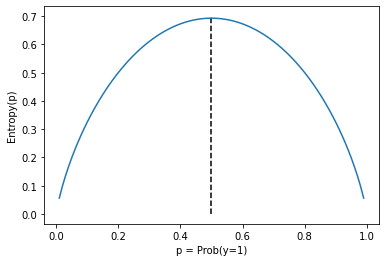

In [47]:
q = 1 - p
pq = np.hstack([p.reshape((-1,1)), q.reshape((-1,1))])
ents = pd.DataFrame(pq).agg(entropy, axis=1)

import matplotlib.pyplot as plt
_ = plt.plot(p, ents.values)
plt.xlabel("p = Prob(y=1)")
_ = plt.ylabel("Entropy(p)")
_ = plt.vlines(.5, 0., .7, 'k', '--')

위 그래프를 보면, Prob(y=1) = p = 0.5 일때 최대값을 갖는다.
- p = 0.5: y = 1의 수와 y = 0인 수가 같다는 것이다.
- 즉, 최대 무질서 상태

[Quiz] tree.png 파일에 있는 3개의 splitter에 대해
```
mean concave points <= 0.0513
worst radius <= 16.8300
worst perimeter <= 114.4500
```
1. root 노드에 적용해보고, 
2. 정보이득이 큰 순으로 splitter를 결정해보자.
3. split의 순서는 어떻게 될까?

In [48]:
np.where(data.feature_names == "mean concave points")

(array([7]),)

In [49]:
mcpIdx = np.where(data.feature_names == "mean concave points")[0][0]
wrIdx = np.where(data.feature_names == "worst radius")[0][0]
wpIdx = np.where(data.feature_names == "worst perimeter")[0][0]

In [53]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([158, 268]))

In [50]:
root = np.unique(y_train, return_counts=True)[1]
mcpLeft = np.unique(y_train[X_train[:,mcpIdx] <= 0.0513], return_counts=True)[1]
mcpRight = np.unique(y_train[X_train[:,mcpIdx] > 0.0513], return_counts=True)[1]
wrLeft = np.unique(y_train[X_train[:,wrIdx] <= 16.8300], return_counts=True)[1]
wrRight = np.unique(y_train[X_train[:,wrIdx] > 16.8300], return_counts=True)[1]
wpLeft = np.unique(y_train[X_train[:,wpIdx] <= 114.4500], return_counts=True)[1]
wpRight = np.unique(y_train[X_train[:,wpIdx] > 114.4500], return_counts=True)[1]
root, mcpLeft, mcpRight, wrLeft, wrRight, wpLeft, wpRight, 

(array([158, 268]),
 array([ 16, 251]),
 array([142,  17]),
 array([ 28, 258]),
 array([130,  10]),
 array([ 34, 263]),
 array([124,   5]))

In [51]:
Igain_mcp = Igain(root, mcpLeft, mcpRight)
Igain_wr = Igain(root, wrLeft, wrRight)
Igain_wp = Igain(root, wpLeft, wpRight)
Igain_mcp, Igain_wr, Igain_wp

(0.3903935490045698, 0.3597269181681925, 0.361730662266245)

In [52]:
data.feature_names[model.feature_importances_.argsort()[::-1]]

array(['mean concave points', 'worst texture', 'worst radius',
       'worst perimeter', 'worst concave points', 'radius error',
       'concave points error', 'mean perimeter', 'worst compactness',
       'mean area', 'texture error', 'mean smoothness',
       'mean compactness', 'mean concavity', 'mean texture',
       'mean symmetry', 'mean fractal dimension',
       'worst fractal dimension', 'smoothness error', 'perimeter error',
       'area error', 'worst symmetry', 'compactness error',
       'concavity error', 'symmetry error', 'fractal dimension error',
       'worst area', 'worst smoothness', 'worst concavity', 'mean radius'],
      dtype='<U23')

worst radius로 왼쪽을 쪼겠을 때의 정보이득량을 계산해보자.

In [67]:
lbv, rbv = X_train[:,mcpIdx] <= 0.0513, X_train[:,mcpIdx] > 0.0513
llbv = (X_train[:,wrIdx] <= 16.8300) & (X_train[:,mcpIdx] <= 0.0513)
lrbv = (X_train[:,wrIdx] > 16.8300) & (X_train[:,mcpIdx] <= 0.0513)
rlbv = (X_train[:,wpIdx] <= 114.4500) & (X_train[:,mcpIdx] > 0.0513)
rrbv = (X_train[:,wpIdx] > 114.4500) & (X_train[:,mcpIdx] > 0.0513)

ytr = pd.Series(y_train)
tmp = pd.Series([0, 0])
tmp.add(ytr[rrbv].value_counts(), fill_value=0)

mcpLeft = tmp.add(ytr[lbv].value_counts(), fill_value=0).values
mcpRight = tmp.add(ytr[rbv].value_counts(), fill_value=0).values
wrll = tmp.add(ytr[llbv].value_counts(), fill_value=0).values
wrlr = tmp.add(ytr[lrbv].value_counts(), fill_value=0).values
wprl = tmp.add(ytr[rlbv].value_counts(), fill_value=0).values
wprr = tmp.add(ytr[rrbv].value_counts(), fill_value=0).values

mcpLeft, mcpRight, wrll, wrlr, wprl, wprr

(array([ 16, 251]),
 array([142,  17]),
 array([  5, 244]),
 array([11,  7]),
 array([24, 17]),
 array([118.,   0.]))

In [68]:
n, nl, nr = root.sum(), mcpLeft.sum(), mcpRight.sum()
Igain_wr = nl / n * Igain(mcpLeft, wrll, wrlr)
Igain_wp = nr / n * Igain(mcpRight, wprl, wprr)

Igain_wr, Igain_wp

(0.056402059227675695, 0.0616083614720937)

따라서, wrong perimeters를 이용하여 우측 branch를 먼저 쪼갰다.

[Quiz] GridSearchCV를 이용하여, 위 max_depth, max_leaf_nodes, min_samples_leaf 구간에 대해 튜닝하여 best model을 선정하자.

In [72]:
len(mds), len(mlns), len(msls)

(4, 5, 9)

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
params = {'max_depth':mds, 'max_leaf_nodes':mlns, 'min_samples_leaf':msls}
fold = StratifiedKFold()
grid = GridSearchCV(DecisionTreeClassifier(), params, n_jobs=-1, cv=fold)
grid.fit(X_train, y_train)
print(grid.best_estimator_)
print(grid.best_params_)
print(grid.best_score_)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=7, min_samples_leaf=5)
{'max_depth': 3, 'max_leaf_nodes': 7, 'min_samples_leaf': 5}
0.9388782489740082


In [74]:
grid.score(X_test, y_test)

0.965034965034965